# Women Seats In Parliaments During 1997-2019 Analysis
## Import packages

In [8]:
import pandas as pd
import seaborn as sns
import numpy as np
from IPython.display import Markdown, display
%matplotlib inline

## Merge datasets

In [9]:
a=pd.read_csv('metadata.csv')
b=pd.read_csv('Country.csv')
merged = a.merge(b, on='Country Code')
merged.head()

#Save csv for other analysis e.g. in Tableau
merged.to_csv("meta1.csv", index=False)

In [10]:
# Select only contries rather that other group name. And select related columns.
countries=merged[merged['IncomeGroup']!='NaN']
country=pd.concat([countries.iloc[:,0],countries.iloc[:,4:29]],axis=1)
country.head(3)


,Country Name,1997,1998,1999,2000,2001,2002,2003,2004,2005,...,2012,2013,2014,2015,2016,2017,2018,2019,Region,IncomeGroup
0,Aruba,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Latin America & Caribbean,High income
1,Afghanistan,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,27.309237,...,27.710843,27.710843,27.710843,27.710843,27.710843,27.710843,NaN,27.868852,South Asia,Low income
2,Angola,9.545455,15.454545,15.454545,15.454545,15.454545,15.454545,15.454545,15.0,15.000000,...,34.090909,34.090909,36.818182,36.818182,36.818182,30.454545,30.454545,30.000000,Sub-Saharan Africa,Lower middle income


## Check the number of missing values in each countries.

Text(0.5, 1.0, 'Count the number of missing value in countries')

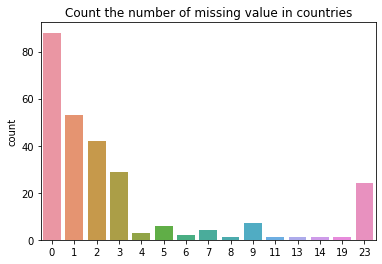

In [11]:
sns.countplot(country.isna().sum(axis=1)).set_title('Count the number of missing value in countries')

In [12]:
# Remove countries that have no data at all.
country_nona=country[country.isna().sum(axis=1)<23]


In [13]:
# Calculate the number of each countries' missing values 
nanum=pd.DataFrame(country_nona.isna().groupby(country_nona['Country Name']).sum().sum(axis=1))
nanum=nanum.rename(columns={0:'NaNum'})

#and merge to original dataframe and keep analysis related columns.
country_nacnt=country_nona.merge(nanum,left_on='Country Name',right_on='Country Name')
country_nacnt=country_nacnt[['Country Name','Region','IncomeGroup','NaNum']]
country_nacnt[country_nacnt['Region']=='South Asia']

,Country Name,Region,IncomeGroup,NaNum
0,Afghanistan,South Asia,Low income,9
16,Bangladesh,South Asia,Lower middle income,2
27,Bhutan,South Asia,Lower middle income,0
95,India,South Asia,Lower middle income,0
123,Sri Lanka,South Asia,Lower middle income,2
135,Maldives,South Asia,Upper middle income,1
159,Nepal,South Asia,Lower middle income,1
165,Pakistan,South Asia,Lower middle income,3


In [14]:
incomegroup=[i for i in set(country_nacnt['IncomeGroup']) if i ==i]
pd.DataFrame(incomegroup).T

,0,1,2,3
0,High income,Lower middle income,Low income,Upper middle income


In [15]:
country_nacnt[country_nacnt['Region']=='South Asia'].groupby(['IncomeGroup']).count()[['NaNum']]

,NaNum
IncomeGroup,
Low income,1
Lower middle income,6
Upper middle income,1


In [16]:
# Get all region .
region=[i for i in set(country_nacnt['Region']) if i ==i]

num_of_missing=pd.DataFrame(columns = ['Region','High income','Upper middle income', 'Lower middle income','Low income'] ) 

for i in region:
    tmp=country_nacnt[country_nacnt['Region']==i].groupby(['IncomeGroup']).sum().T
    num_of_missing=pd.concat([num_of_missing,tmp])
    num_of_missing.iloc[-1,0]=i
num_of_missing.fillna(0,inplace=True)
num_of_missing.set_index('Region',inplace=True)
display(Markdown('## The number of missing values under each  category'))
num_of_missing

## The number of missing values under each  category

,High income,Upper middle income,Lower middle income,Low income
Region,,,,
Middle East & North Africa,28,12,4,1
Latin America & Caribbean,5,17,6,1
East Asia & Pacific,23,19,25,1
Sub-Saharan Africa,0,4,21,66
Europe & Central Asia,6,36,4,0
South Asia,0,1,8,9
North America,2,0,0,0


In [17]:
num_of_missing.sum()

High income            64
Upper middle income    89
Lower middle income    68
Low income             78
dtype: int64

In [18]:
number_of_countries=pd.DataFrame(columns = ['Region','High income','Upper middle income', 'Lower middle income','Low income'] ) 
for i in region:
    tmp=country_nacnt[country_nacnt['Region']==i].groupby(['IncomeGroup']).count()[['NaNum']].T
    number_of_countries=pd.concat([number_of_countries,tmp])
    number_of_countries.iloc[-1,0]=i
number_of_countries.set_index('Region',inplace=True)
number_of_countries.fillna(0,inplace=True)
display(Markdown('## The number of countries under each category'))
number_of_countries

## The number of countries under each category

,High income,Upper middle income,Lower middle income,Low income
Region,,,,
Middle East & North Africa,8,5,5,2
Latin America & Caribbean,8,20,4,1
East Asia & Pacific,8,9,12,1
Sub-Saharan Africa,2,5,18,23
Europe & Central Asia,33,14,4,1
South Asia,0,1,6,1
North America,2,0,0,0


In [19]:
display(Markdown("## The average number of missing value per country under each category" ))
pd.options.display.float_format = '{:.2f}'.format
(num_of_missing/number_of_countries).fillna(0)

## The average number of missing value per country under each category

,High income,Upper middle income,Lower middle income,Low income
Region,,,,
Middle East & North Africa,3.50,2.40,0.80,0.50
Latin America & Caribbean,0.62,0.85,1.50,1.00
East Asia & Pacific,2.88,2.11,2.08,1.00
Sub-Saharan Africa,0.00,0.80,1.17,2.87
Europe & Central Asia,0.18,2.57,1.00,0.00
South Asia,0.00,1.00,1.33,9.00
North America,1.00,0.00,0.00,0.00


In [20]:
display(Markdown("## The average number of missing value" ))
display(Markdown("## per country under each income group" ))
df=pd.DataFrame(num_of_missing.sum()/number_of_countries.sum())
df.columns=['Avg_missing_value']
df

## The average number of missing value

## per country under each income group

,Avg_missing_value
High income,1.05
Upper middle income,1.65
Lower middle income,1.39
Low income,2.69


In [21]:
display(Markdown("## The average number of missing value " ))
display(Markdown("## per country under each region group" ))
df=pd.DataFrame(num_of_missing.sum(axis=1)/number_of_countries.sum(axis=1))
df.columns=['Avg_missing_value']
df

## The average number of missing value 

## per country under each region group

,Avg_missing_value
Region,
Middle East & North Africa,2.25
Latin America & Caribbean,0.88
East Asia & Pacific,2.27
Sub-Saharan Africa,1.90
Europe & Central Asia,0.88
South Asia,2.25
North America,1.00


In [22]:
m1=country_nacnt[country_nacnt['IncomeGroup']=='High income'].NaNum.mean()
n1=country_nacnt[country_nacnt['IncomeGroup']=='High income'].NaNum.count()
s1=country_nacnt[country_nacnt['IncomeGroup']=='High income'].NaNum.std()
m2=country_nacnt[country_nacnt['IncomeGroup']=='Low income'].NaNum.mean()
n2=country_nacnt[country_nacnt['IncomeGroup']=='Low income'].NaNum.count()
s2=country_nacnt[country_nacnt['IncomeGroup']=='Low income'].NaNum.std()

In [23]:
import math
z=abs(m1-m2)/math.sqrt(s1*s1/n1+s2*s1/n2)
print('The z-value of missing values in high income and low income is',z)

The z-value of missing values in high income and low income is 2.3258271712527323


In [24]:
country_nacnt[country_nacnt['IncomeGroup']=='High income'].NaNum.value_counts()

0     42
1     12
6      2
19     1
9      1
7      1
3      1
2      1
Name: NaNum, dtype: int64

In [25]:
country_nacnt[country_nacnt['IncomeGroup']=='Low income'].NaNum.value_counts()

1     8
0     8
3     4
2     3
9     2
14    1
8     1
7     1
5     1
Name: NaNum, dtype: int64

In [26]:
country_nona.isna().groupby(country_nona['Region']).sum().sum(axis=1)

Region
East Asia & Pacific          68.00
Europe & Central Asia        46.00
Latin America & Caribbean    29.00
Middle East & North Africa   45.00
North America                 2.00
South Asia                   18.00
Sub-Saharan Africa           91.00
dtype: float64